<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/master/SignalProcUsingML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import numpy as np

# Prepare Sample Signal and Noise Data

In [0]:
fs = 1e3
fr = np.float(100.0) #Signal Ffrequency
N = 1e3
t_value = np.arange(N) / fs

a = 50 #Amplitude
x = a*np.sin(2*np.pi*fr*t_value) + a*np.cos(2*np.pi*fr*t_value) #Signal
n = 1e2*np.random.randn(len(t_value)) #Noise
xn = x + 1e2*np.random.randn(len(t_value)) # Noise+Signal

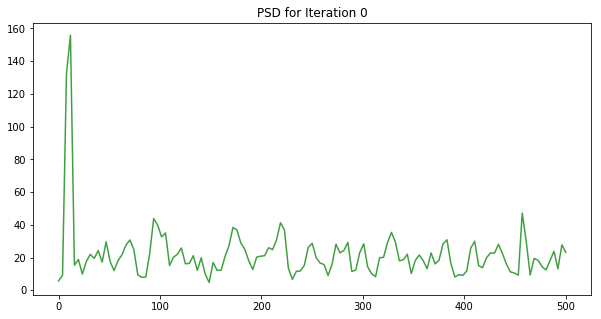

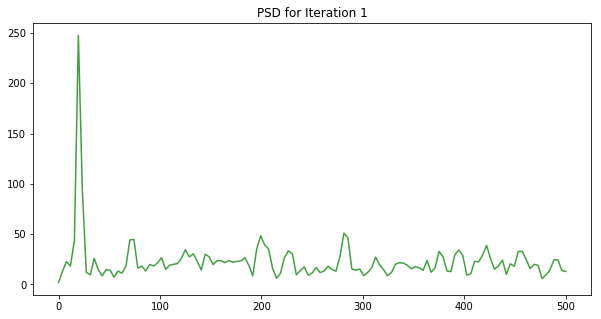

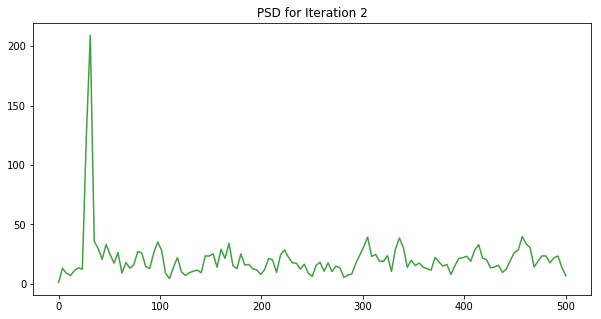

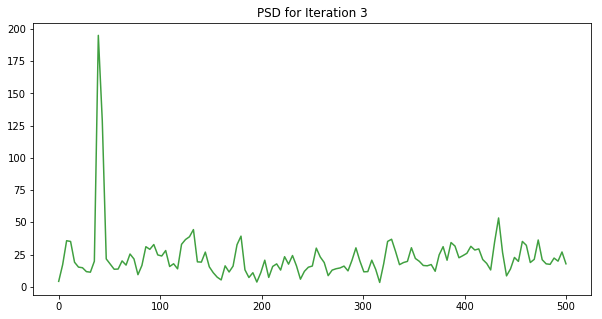

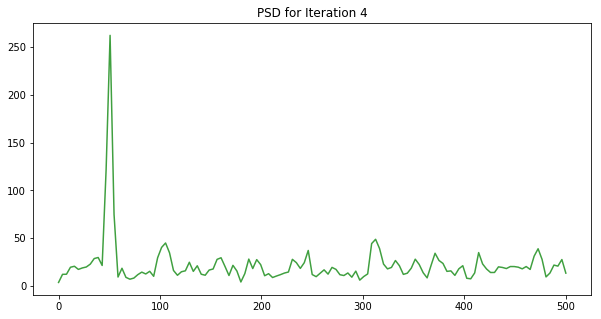

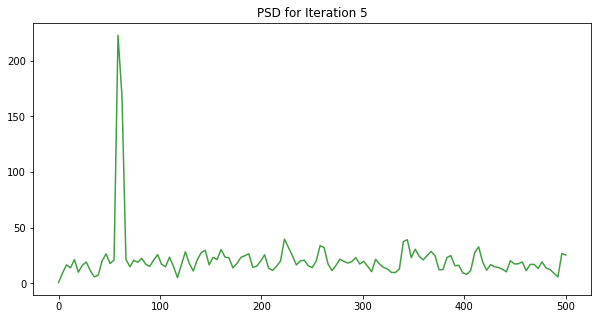

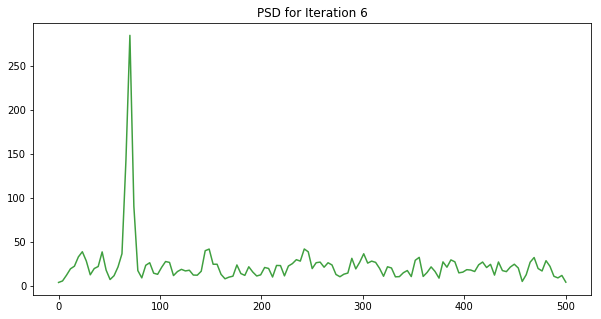

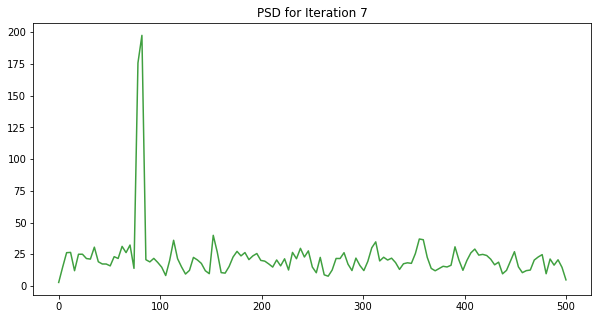

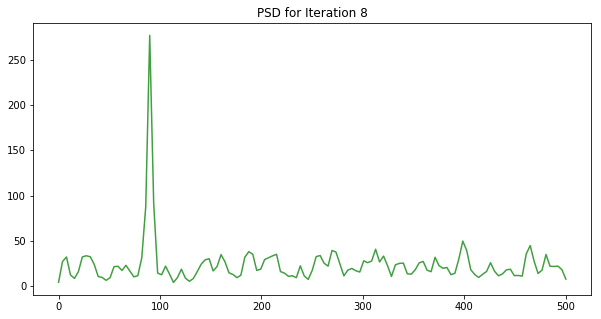

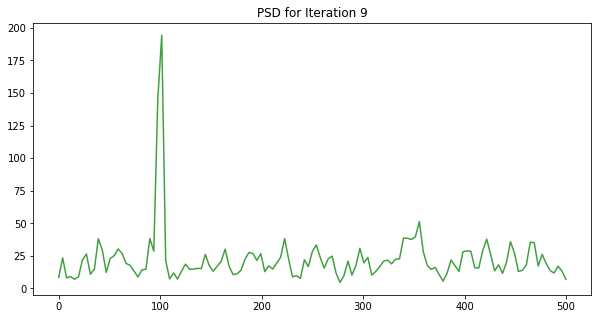

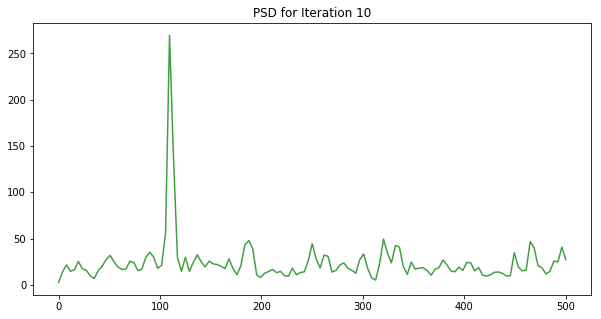

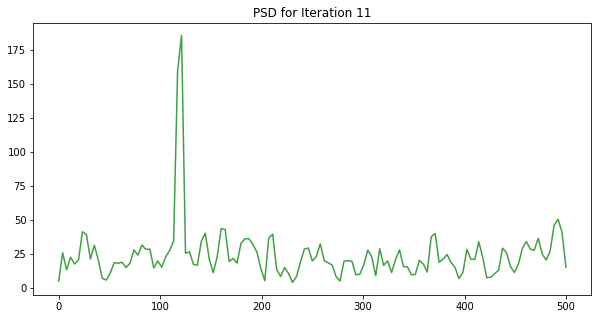

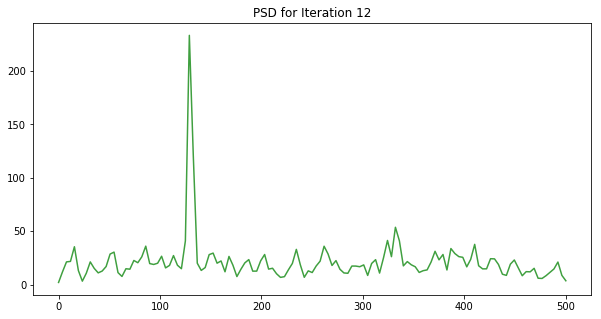

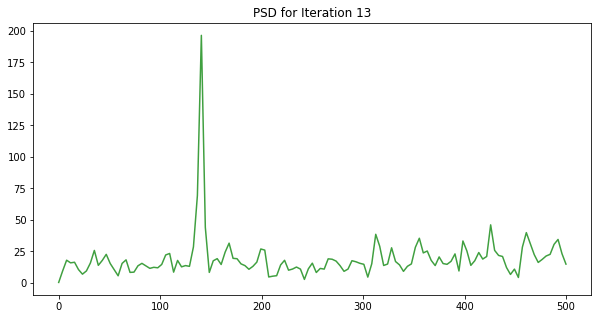

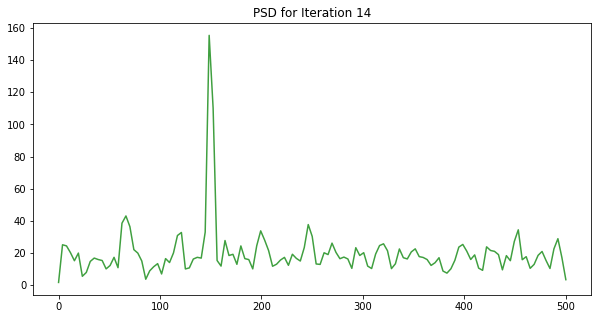

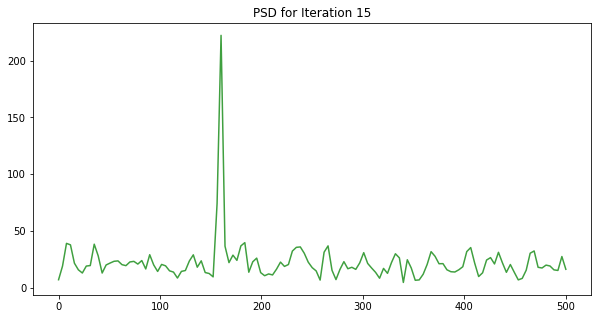

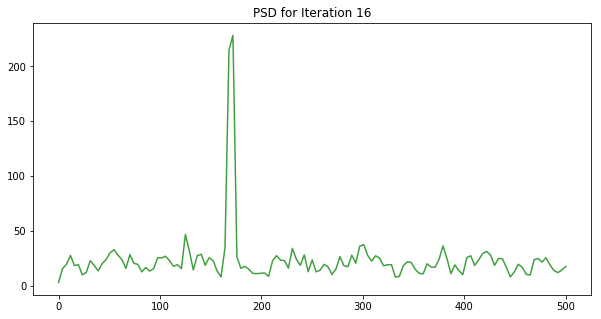

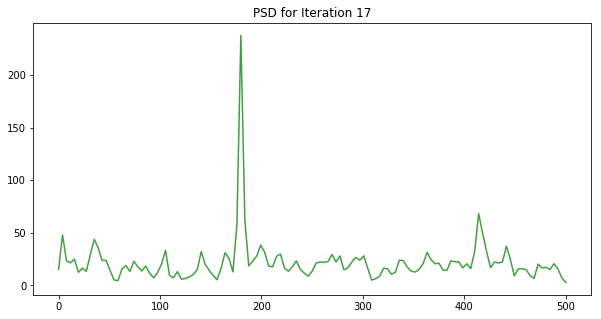

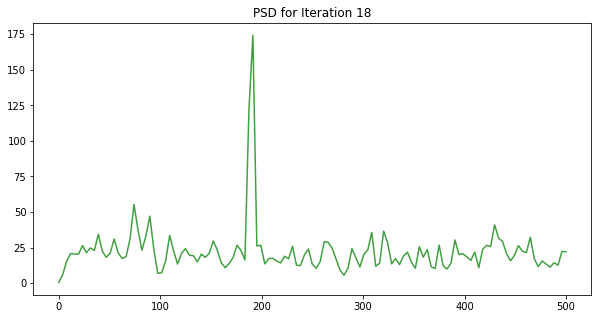

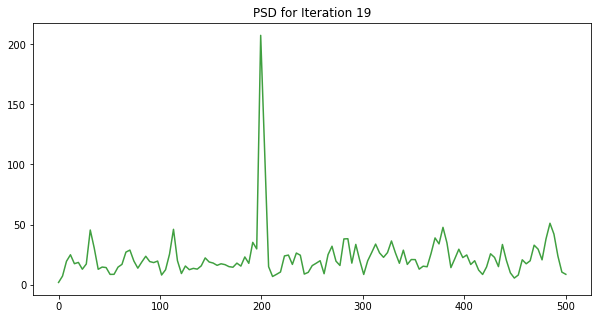

In [110]:
alpha = np.linspace(0.1, 2, num = 20)
a = 50 #Amplitude

fs = 1e3
fr = np.float(100.0) #Signal Ffrequency
N = 1e3
t_value = np.arange(N) / fs
signal = np.empty((0,1000))

""""def plot_source(signal, noise, raw, t, i):
  f, (ax3) = plt.subplots(1, 1)
  f.set_figwidth(20)
  f.set_figheight(5)
  #ax1.plot(t, signal, 'r' , alpha=0.75)
  #ax2.plot(t, noise, 'b', alpha=0.75)
  ax3.plot(t, raw, 'g', alpha=0.75)
  ax3.plot(t, signal, 'r', alpha=0.75)
  ax3.title.set_text('Plot for Iteration %d' %i)"""

""""def get_fft_values(y_values):   
  s = len(y_values) 
  k = np.arange(s)
  T = s/fs
  frq = k/T # two sides frequency range
  f_values = frq[range(int(s/2))] # one side frequency range
  fft_values = np.fft.fft(y_values)/n # fft computing and normalization
  fft_values = fft_values[range(int(s/2))]
  return f_values, fft_values
  
def plot_fft(signal, raw):
  freq_s,  fft_s = get_fft_values(x)
  freq_raw, fft_raw = get_fft_values(xn)
  ft, (axft1, axft2) = plt.subplots(2, 1)
  ft.set_figwidth(30)
  ft.set_figheight(10)
  axft1.plot(freq_raw, abs(fft_raw), 'g' , alpha=0.75)
  axft2.plot(freq_s, abs(fft_s), 'r', alpha=0.75)
  axft1.title.set_text('Plot for Iteration %d' %i)"""

from scipy.signal import welch
 
def get_psd_values(y_values, fs):
    f_values, psd_values = welch(y_values, fs=fs)
    return f_values, psd_values

def plot_psd(signal, fs):
  f_values, psd_values = get_psd_values(xn, fs)
  ft, (axft1) = plt.subplots(1, 1)
  ft.set_figwidth(10)
  ft.set_figheight(5)
  axft1.plot(f_values, psd_values, 'g' , alpha=0.75)
  axft1.title.set_text('PSD for Iteration %d' %i)

for i in range(0, 20, 1):
  
  #Set 1
  x = (a*np.sin(2*np.pi*alpha[i]*fr*t_value))
  n = 1e2*np.random.randn(len(t_value)) #Noise
  xn = x + 1e2*np.random.randn(len(t_value)) # Noise+Signal
  
  #plot_source(x, n, xn, t_value, i)
  #plot_fft(x, xn)
  plot_psd(signal, fs)

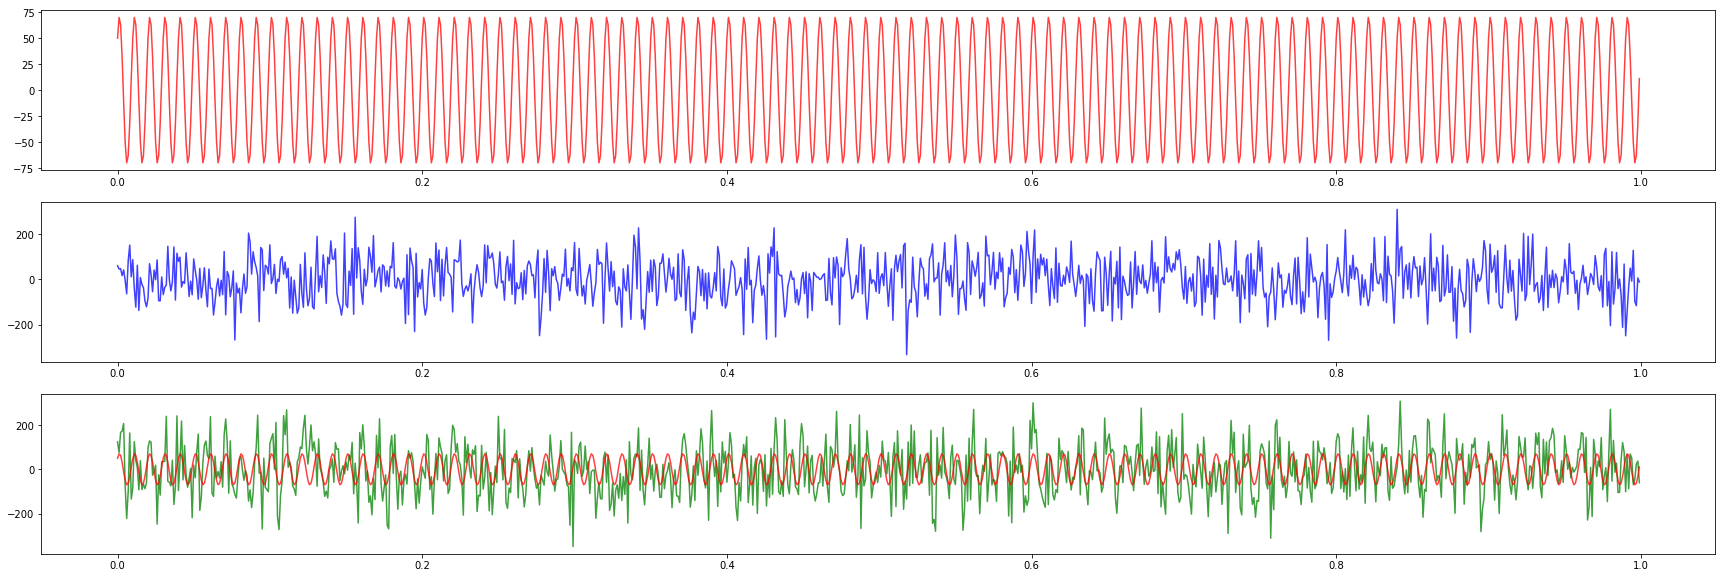

In [5]:
def plot_source(signal, noise, raw, t):
  f, (ax1, ax2, ax3) = plt.subplots(3, 1)
  f.set_figwidth(30)
  f.set_figheight(10)
  ax1.plot(t, signal, 'r' , alpha=0.75)
  ax2.plot(t, noise, 'b', alpha=0.75)
  ax3.plot(t, raw, 'g', alpha=0.75)
  ax3.plot(t, signal, 'r', alpha=0.75)
  
plot_source(x, n, xn, t_value)

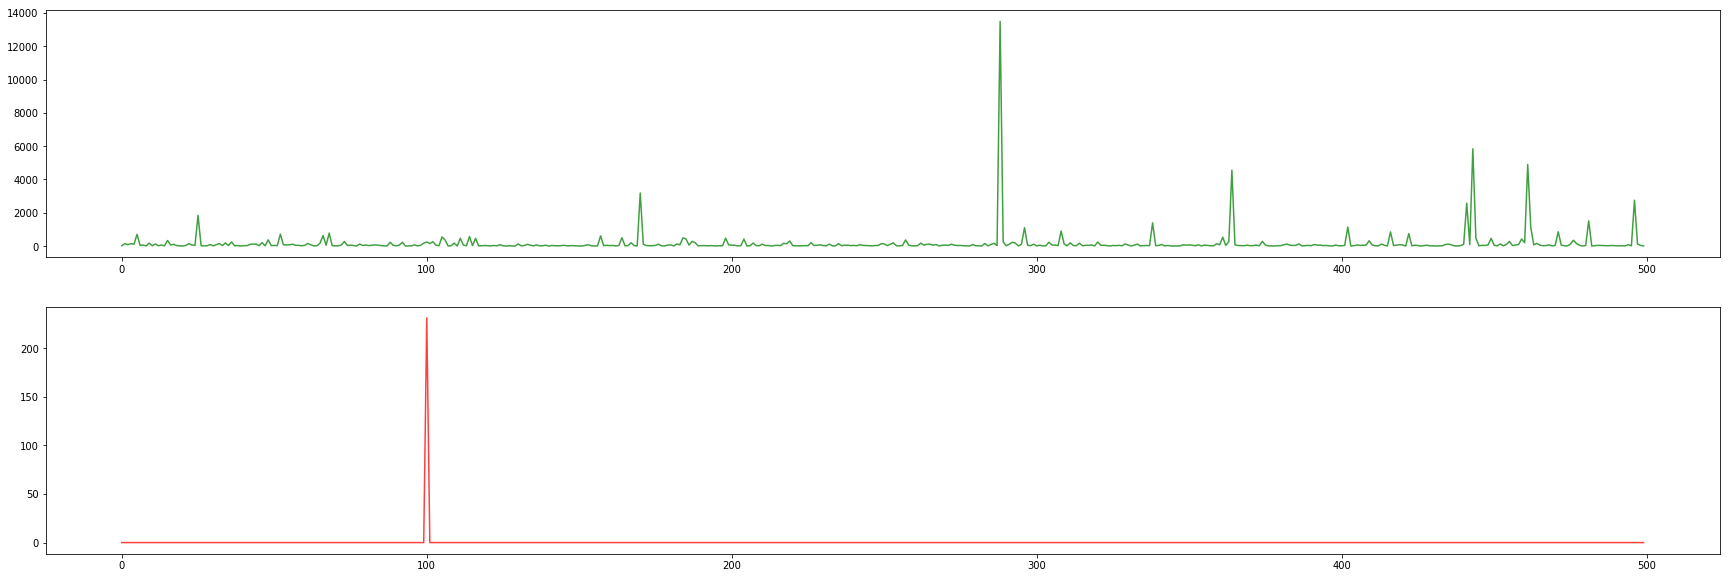

In [6]:
def get_fft_values(y_values):   
    s = len(y_values) 
    k = np.arange(s)
    T = s/fs
    frq = k/T # two sides frequency range
    f_values = frq[range(int(s/2))] # one side frequency range
    fft_values = np.fft.fft(y_values)/n # fft computing and normalization
    fft_values = fft_values[range(int(s/2))]
    return f_values, fft_values
  

 
#plt.plot(f_values, fft_values, linestyle='-', color='blue')
#plt.xlabel('Frequency [Hz]', fontsize=16)
#plt.ylabel('Amplitude', fontsize=16)
#plt.title("Frequency domain of the signal", fontsize=16)
#plt.show()

def plot_fft(signal, raw):
  freq_s,  fft_s = get_fft_values(x)
  freq_raw, fft_raw = get_fft_values(xn)
  ft, (axft1, axft2) = plt.subplots(2, 1)
  ft.set_figwidth(30)
  ft.set_figheight(10)
  axft1.plot(freq_raw, abs(fft_raw), 'g' , alpha=0.75)
  axft2.plot(freq_s, abs(fft_s), 'r', alpha=0.75)
  
plot_fft(x, xn)

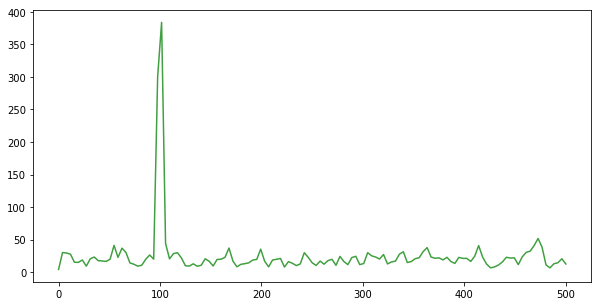

In [7]:
from scipy.signal import welch
 
def get_psd_values(y_values, fs):
    f_values, psd_values = welch(y_values, fs=fs)
    return f_values, psd_values
f_values, psd_values = get_psd_values(xn, fs)

ft, (axft1) = plt.subplots(1, 1)
ft.set_figwidth(10)
ft.set_figheight(5)
axft1.plot(f_values, psd_values, 'g' , alpha=0.75)

[(-2000000.0, 4000000.0)]

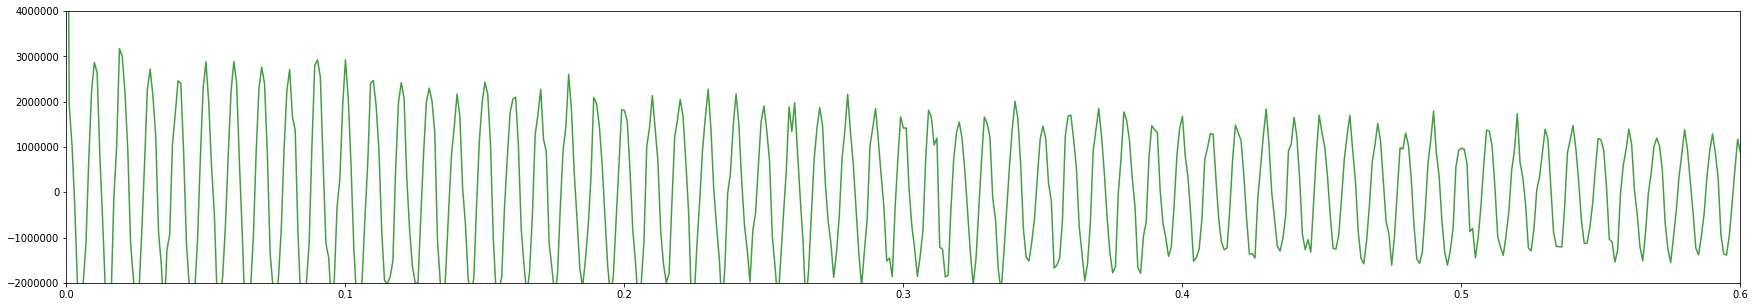

In [8]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]
 
def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values


t_values, autocorr_values = get_autocorr_values(xn, 0.01, 1000, fs)

ft, (axft1) = plt.subplots(1, 1)
ft.set_figwidth(30)
ft.set_figheight(5)
axft1.plot(t_value, autocorr_values, 'g' , alpha=0.75)
axft1.axes.set(xlim = (0, 0.6))
axft1.axes.set(ylim = (-0.2e7, 0.4e7))

In [0]:
import pywt
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


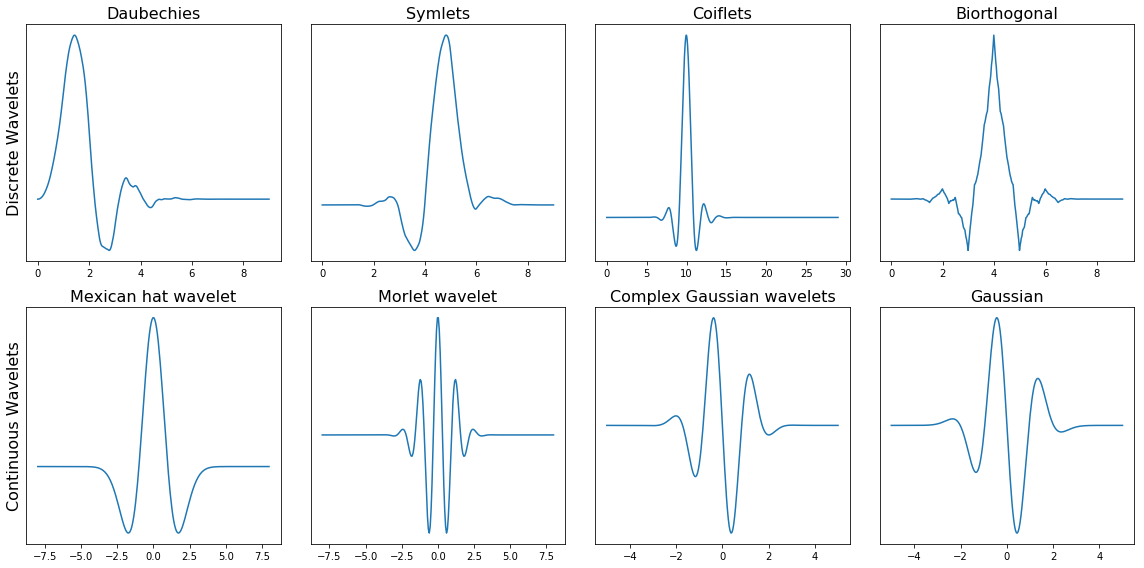

In [0]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
 
list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
 
plt.tight_layout()
plt.show()

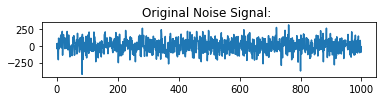

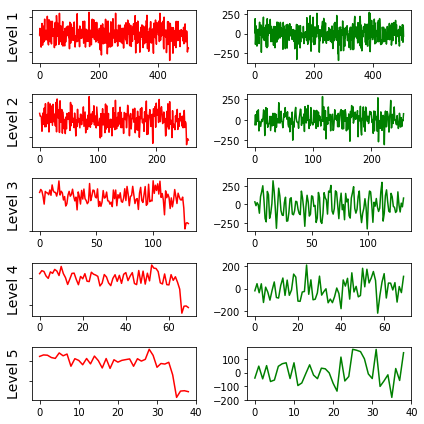

In [0]:
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Noise Signal: ")
ax.plot(n)
plt.show()

data = xn
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
  (data, coeff_d) = pywt.dwt(data, waveletname)
  axarr[ii, 0].plot(data, 'r')
  axarr[ii, 1].plot(coeff_d, 'g')
  axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
  axarr[ii, 0].set_yticklabels([])
  
plt.tight_layout()
plt.show()

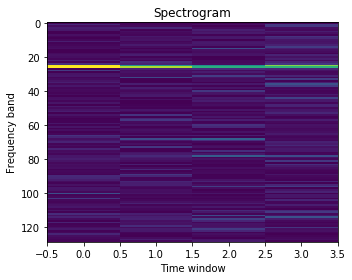

In [0]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(xn)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

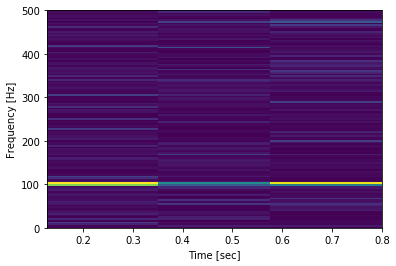

In [9]:
from scipy import signal
f, t, Sxx = signal.spectrogram(xn, fs)
plt.pcolormesh(t, f[0:500], Sxx[0:500])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Text(0, 0.5, 'Frequency')

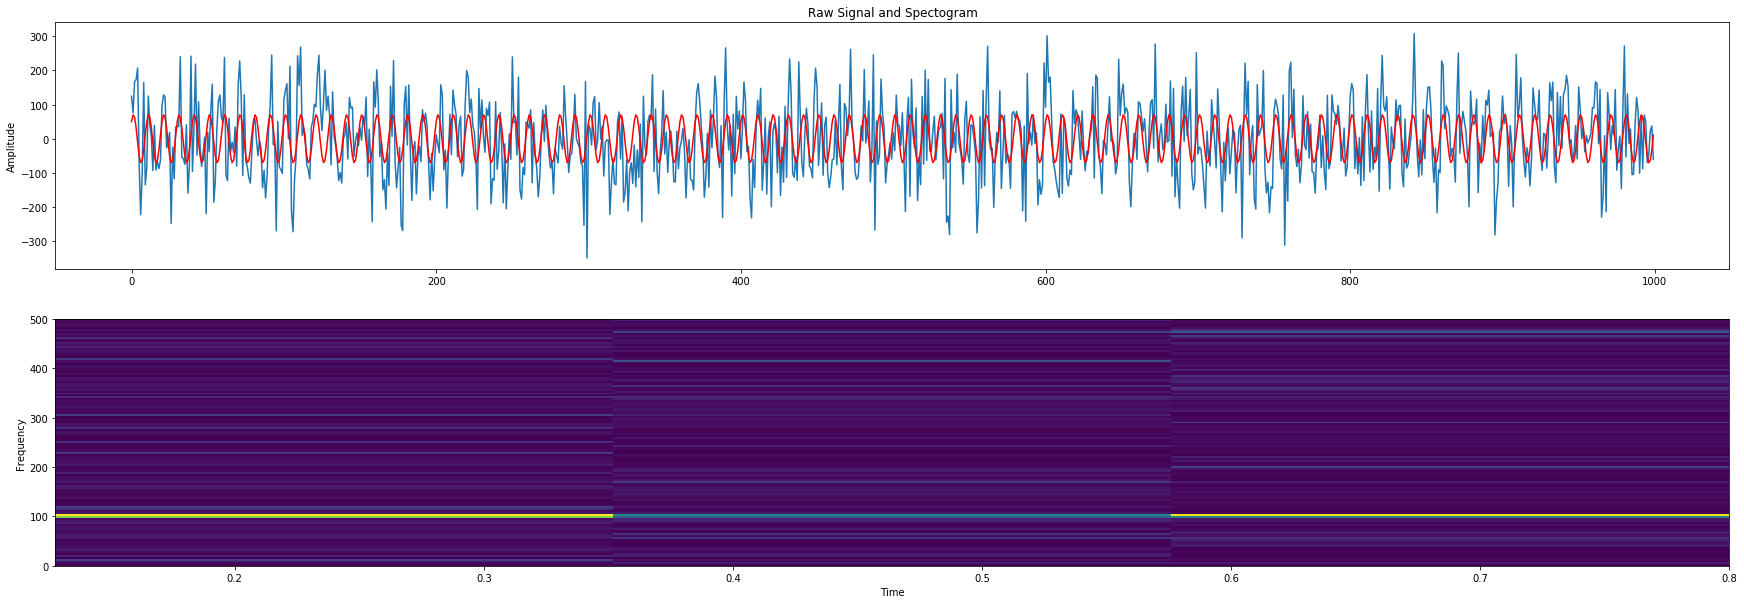

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figwidth(30)
fig.set_figheight(10)
#fig.title('Raw Signal and Spectogram')
ax1.set_title('Raw Signal and Spectogram')
ax1.plot(xn)
ax1.plot(x, 'r')
ax1.set_ylabel('Amplitude')

f, t, Sxx = signal.spectrogram(xn, fs)
ax2.pcolormesh(t, f[0:500], Sxx[0:500])
#ax2.specgram(xn,Fs=fs)
ax2.set_xlabel('Time')
ax2.set_ylabel('Frequency')